# Sales Perdiction

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
from datetime import datetime
from sklearn.svm import SVR
import calendar
from sklearn.preprocessing import LabelEncoder


### Read Data

In [2]:
read=pd.read_csv("Advertising.csv")
df=pd.DataFrame(read)
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Data Preprcocessing

In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df[df.duplicated()]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
#This colum represent index no we dont need yest so drop it

### Data Visulization

Text(0.5, 1.0, 'Sales')

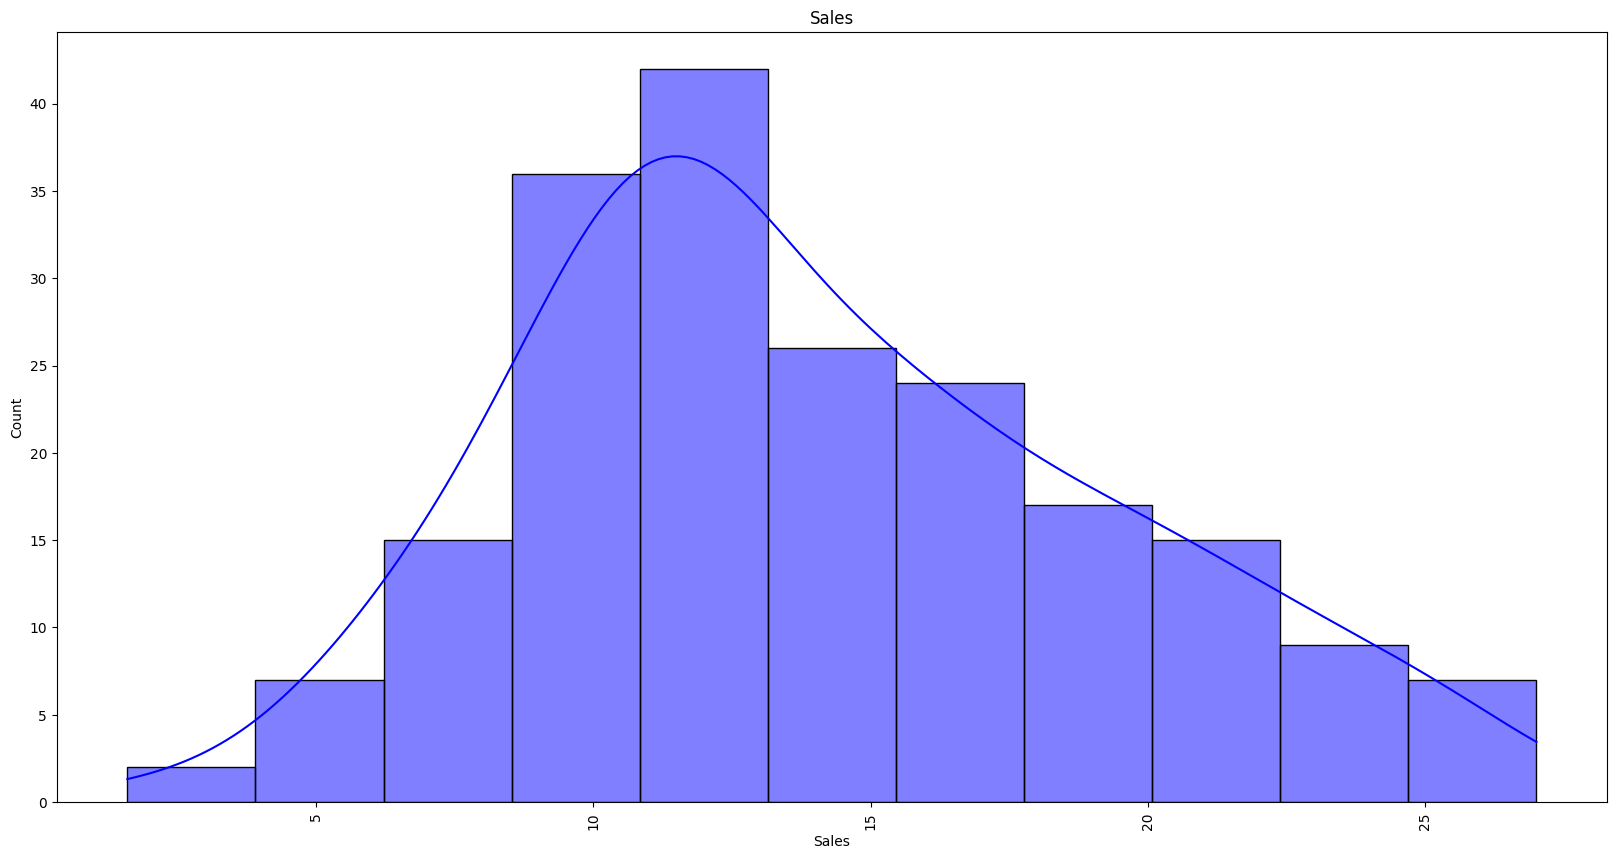

In [9]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Sales'],color="blue",kde=True)
plt.xticks(rotation=90)
plt.title('Sales')


Text(0.5, 1.0, 'TV')

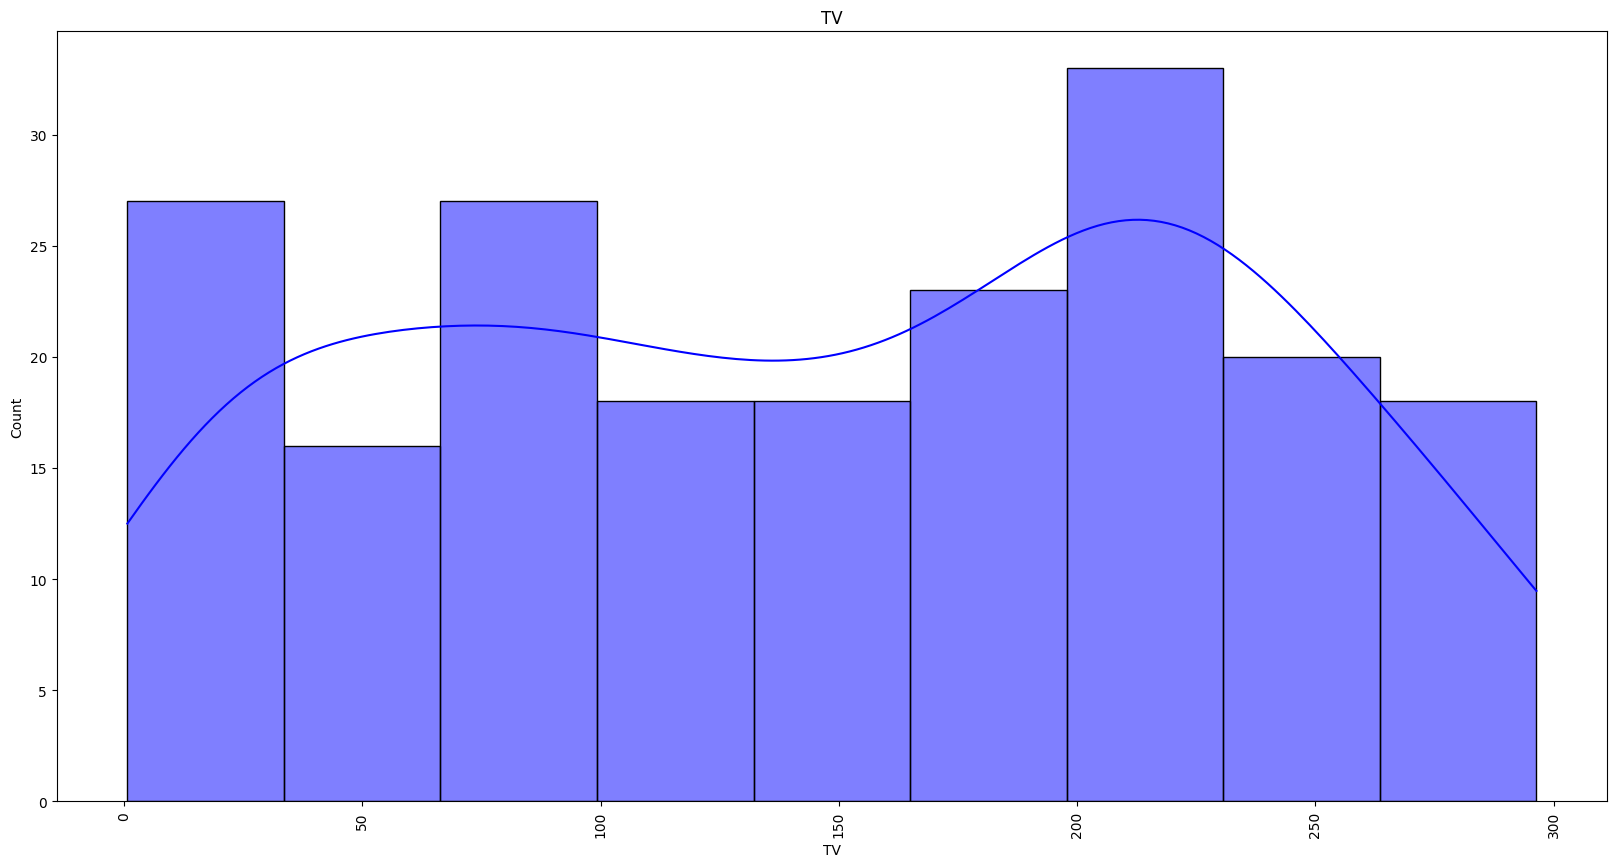

In [10]:
plt.figure(figsize=(20, 10))
sns.histplot(df['TV'],color="blue",kde=True)
plt.xticks(rotation=90)
plt.title('TV')


Text(0.5, 1.0, 'Radio')

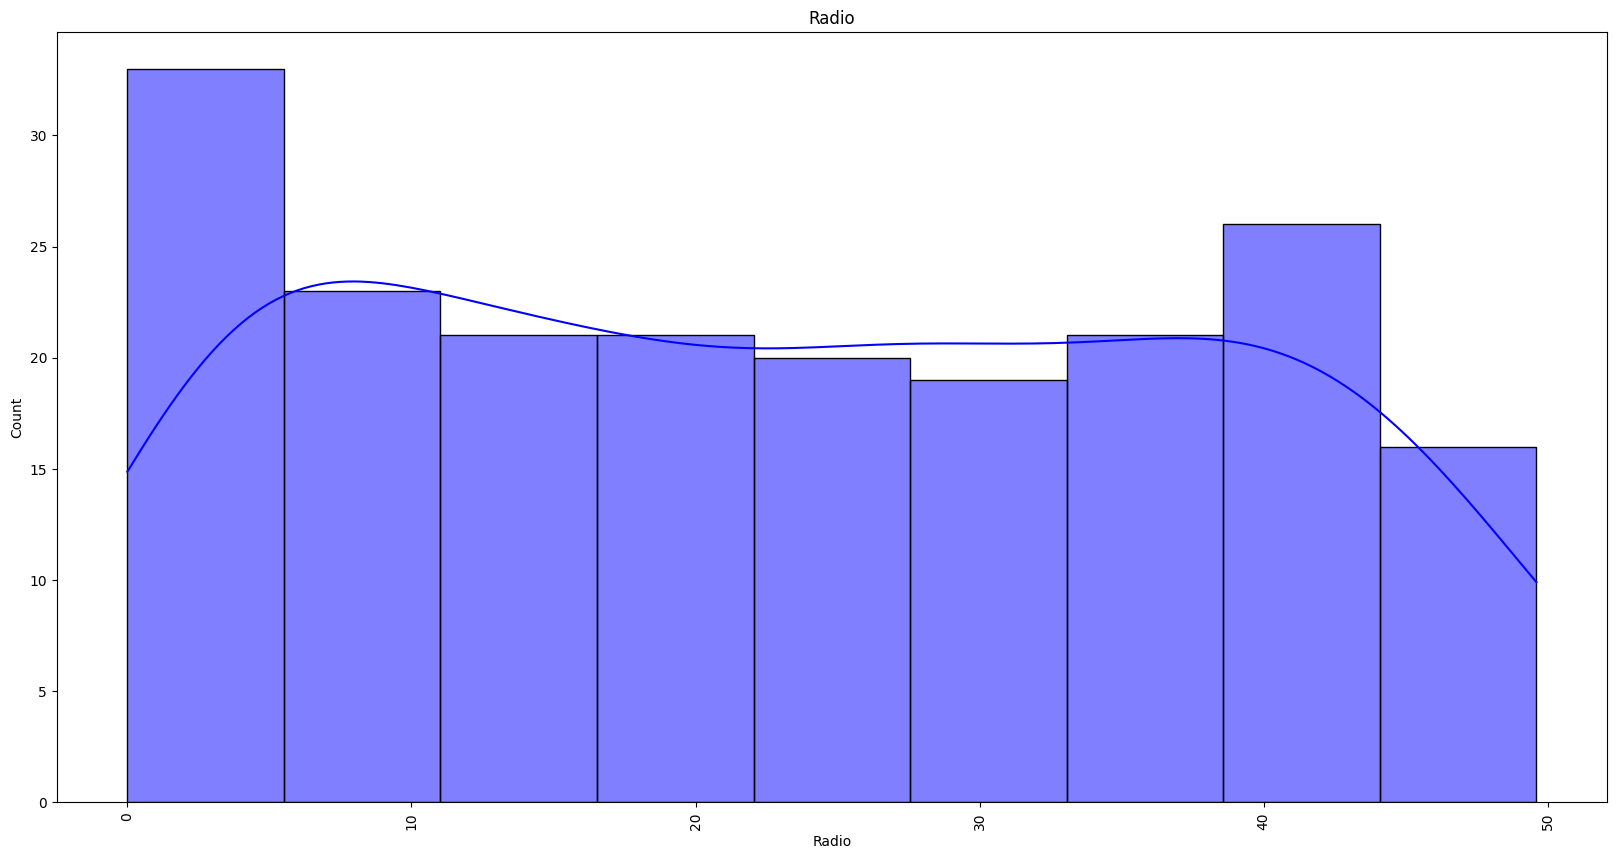

In [11]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Radio'],color="blue",kde=True)
plt.xticks(rotation=90)
plt.title('Radio')


Text(0.5, 1.0, 'NewsPaper')

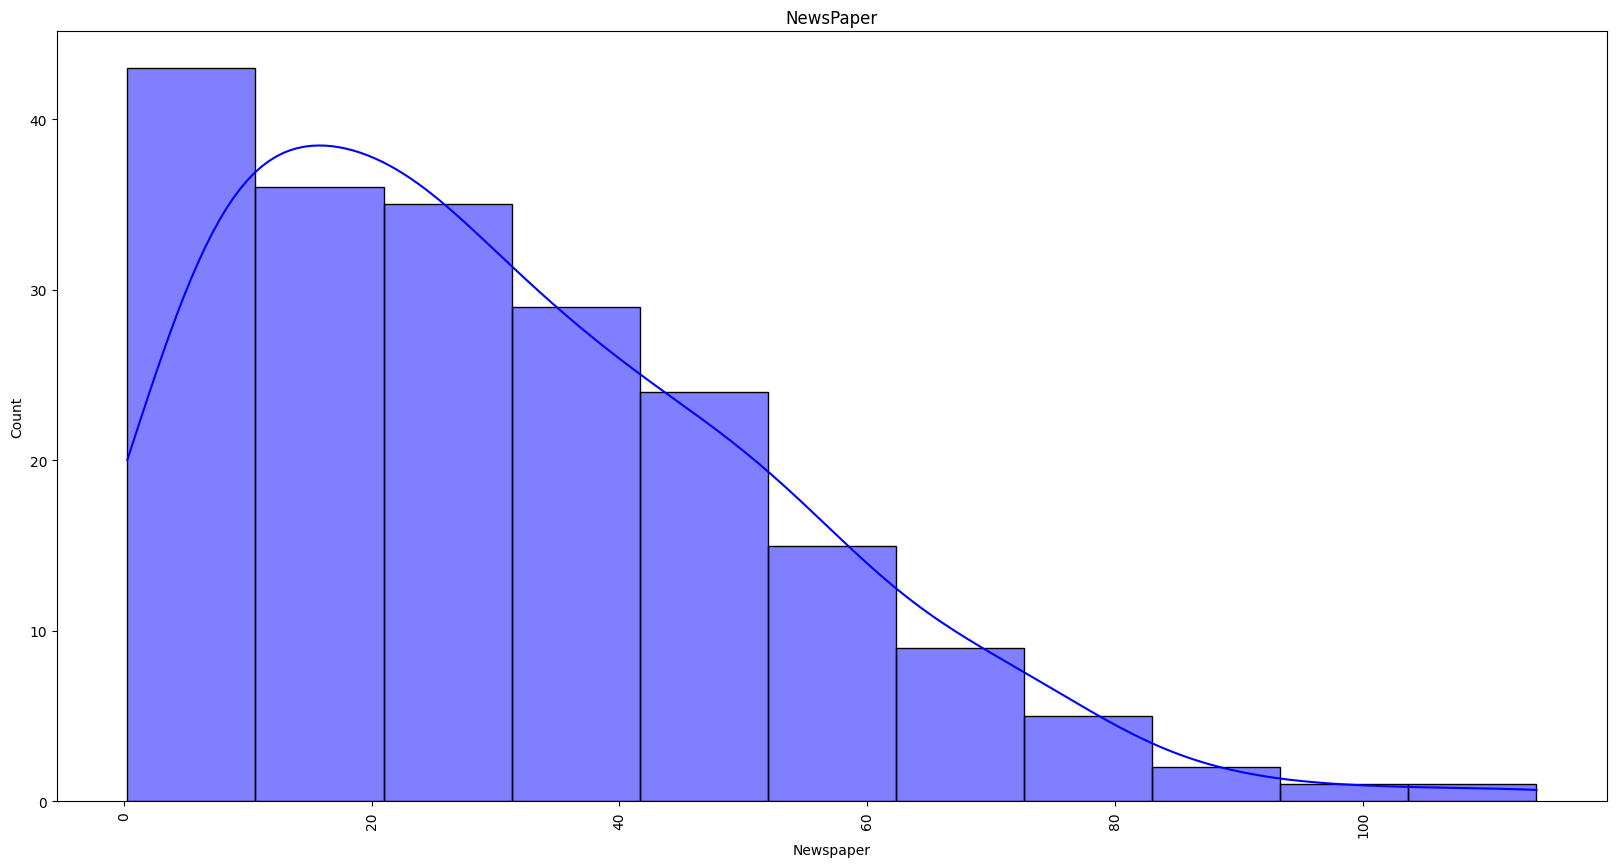

In [12]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Newspaper'],color="blue",kde=True)
plt.xticks(rotation=90)
plt.title('NewsPaper')


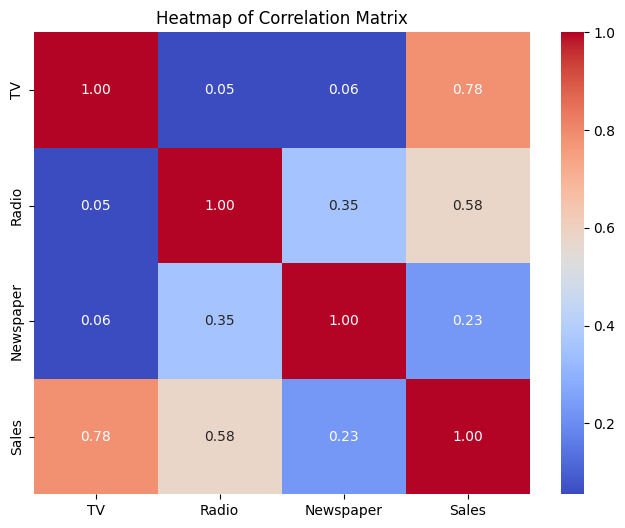

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Feature Engineering

In [14]:
numerical_features = ["TV","Newspaper","Radio","Sales"]

scaler_minmax = MinMaxScaler()
df[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

### Model Traning

In [15]:
x = df.drop(['Sales'], axis=1)
y=df["Sales"]
print(x.columns)

Index(['TV', 'Radio', 'Newspaper'], dtype='object')


In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Linear Regression Model

In [17]:
Linear = LinearRegression()

Linear.fit(X_train, y_train)

y_pred =Linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

print(f"R-squared (R²): {r2}")

n_features = Linear.coef_.shape[0]
print("Number of features:", n_features,"\n\n")


coefficients = Linear.coef_
feature_names = X_train.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Mean Squared Error: 0.004919860738384439
R-squared (R²): 0.899438024100912
Number of features: 3 


Feature: TV, Coefficient: 0.5207290675393471
Feature: Radio, Coefficient: 0.3694517594498061
Feature: Newspaper, Coefficient: 0.012359791362734213


### Decision Tree Regression Model

In [18]:
DecisionTree = DecisionTreeRegressor()

DecisionTree.fit(X_train, y_train)

y_pred = DecisionTree.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

print(f"R-squared (R²): {r2}")


number_of_features = len(DecisionTree.feature_importances_)
print("Number of features used in the DecisionTreeRegressor model:", number_of_features,"\n\n")


feature_importance = DecisionTree.feature_importances_
feature_names = list(X_train.columns)  
feature_importance_sequence = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance_sequence:
    print(f"Feature: {feature}, Importance: {importance}")


Mean Squared Error: 0.0036343697687395383
R-squared (R²): 0.9257134653749622
Number of features used in the DecisionTreeRegressor model: 3 


Feature: TV, Importance: 0.6057819500168601
Feature: Radio, Importance: 0.38002927473885717
Feature: Newspaper, Importance: 0.01418877524428276


### Random Forest Regression

In [19]:
RandomForest = RandomForestRegressor()

RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

print(f"R-squared (R²): {r2}")

number_of_features = len(RandomForest.feature_importances_)
print("Number of features used in the RandomForestRegressor model:", number_of_features,"\n\n")




feature_importance = RandomForest.feature_importances_
feature_names = list(X_train.columns)  
feature_importance_sequence = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance_sequence:
    print(f"Feature: {feature}, Importance: {importance}")

Mean Squared Error: 0.0007359940169880348
R-squared (R²): 0.9849562789408287
Number of features used in the RandomForestRegressor model: 3 


Feature: TV, Importance: 0.614694408980287
Feature: Radio, Importance: 0.37286304361976125
Feature: Newspaper, Importance: 0.012442547399951794


### Save Model

In [20]:
#Linear Regression mode
pickle.dump(Linear , open("linear.pkl", "wb"))

#Decision Tree Regression
pickle.dump(DecisionTree , open("DecisionTree.pkl", "wb"))

#Random Forest Regression
pickle.dump(RandomForest, open("RandomForest.pkl", "wb"))


In [21]:
df

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.318898
197,0.596212,0.187500,0.053650,0.440945
198,0.956713,0.846774,0.579595,0.940945
